In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import csv
import tensorflow as tf
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, InputLayer, Dropout, BatchNormalization
import pandas as pd
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

ImportError: dlopen(/Users/mohamed/Downloads/Anaconda_Python_3.5/anaconda/lib/python3.6/site-packages/tensorflow/python/_pywrap_tfe.so, 0x0002): Library not loaded: '@rpath/_pywrap_tensorflow_internal.so'
  Referenced from: '/Users/mohamed/Downloads/Anaconda_Python_3.5/anaconda/lib/python3.6/site-packages/tensorflow/python/_pywrap_tfe.so'
  Reason: tried: '/Users/mohamed/Downloads/Anaconda_Python_3.5/anaconda/lib/python3.6/site-packages/tensorflow/python/../../_solib_darwin_x86_64/_U_S_Stensorflow_Spython_C_Upywrap_Utfe.so___Utensorflow/_pywrap_tensorflow_internal.so' (no such file), '/Users/mohamed/Downloads/Anaconda_Python_3.5/anaconda/lib/python3.6/site-packages/tensorflow/python/../../_solib_darwin_x86_64/_U_S_Stensorflow_Spython_C_Upywrap_Utensorflow_Uinternal_Umacos___Utensorflow_Spython/_pywrap_tensorflow_internal.so' (no such file), '/Users/mohamed/Downloads/Anaconda_Python_3.5/anaconda/lib/python3.6/site-packages/tensorflow/python/_pywrap_tensorflow_internal.so' (no such file), '/Users/mohamed/Downloads/Anaconda_Python_3.5/anaconda/lib/python3.6/site-packages/tensorflow/python/../_pywrap_tensorflow_internal.so' (no such file), '/Users/mohamed/Downloads/Anaconda_Python_3.5/anaconda/lib/python3.6/site-packages/tensorflow/python/../../_solib_darwin_x86_64/_U_S_Stensorflow_Spython_C_Upywrap_Utfe.so___Utensorflow/_pywrap_tensorflow_internal.so' (no such file), '/Users/mohamed/Downloads/Anaconda_Python_3.5/anaconda/lib/python3.6/site-packages/tensorflow/python/../../_solib_darwin_x86_64/_U_S_Stensorflow_Spython_C_Upywrap_Utensorflow_Uinternal_Umacos___Utensorflow_Spython/_pywrap_tensorflow_internal.so' (no such file), '/Users/mohamed/Downloads/Anaconda_Python_3.5/anaconda/lib/python3.6/site-packages/tensorflow/python/_pywrap_tensorflow_internal.so' (no such file), '/Users/mohamed/Downloads/Anaconda_Python_3.5/anaconda/lib/python3.6/site-packages/tensorflow/python/../_pywrap_tensorflow_internal.so' (no such file), '/opt/concourse/worker/volumes/live/a23fb323-ca62-47ad-6872-28d468880fed/volume/python_1578429720166/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehol/lib/_pywrap_tensorflow_internal.so' (no such file), '/opt/concourse/worker/volumes/live/a23fb323-ca62-47ad-6872-28d468880fed/volume/python_1578429720166/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehol/lib/_pywrap_tensorflow_internal.so' (no such file), '/Users/mohamed/Downloads/Anaconda_Python_3.5/anaconda/bin/../lib/_pywrap_tensorflow_internal.so' (no such file), '/opt/concourse/worker/volumes/live/a23fb323-ca62-47ad-6872-28d468880fed/volume/python_1578429720166/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehol/lib/_pywrap_tensorflow_internal.so' (no such file), '/opt/concourse/worker/volumes/live/a23fb323-ca62-47ad-6872-28d468880fed/volume/python_1578429720166/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehol/lib/_pywrap_tensorflow_internal.so' (no such file), '/Users/mohamed/Downloads/Anaconda_Python_3.5/anaconda/bin/../lib/_pywrap_tensorflow_internal.so' (no such file), '/usr/local/lib/_pywrap_tensorflow_internal.so' (no such file), '/usr/lib/_pywrap_tensorflow_internal.so' (no such file)

## Data preprocessing and reshape

In [2]:
rng = np.random.default_rng()
train_dataset = '/kaggle/input/digit-recognizer/train.csv'
test_dataset = '/kaggle/input/digit-recognizer/test.csv'

def data_transform(file):
    x_data = []
    y_data = []
    with open(file, 'r') as csvfile:
        reader = csv.reader(csvfile, delimiter = ',')
        next(reader)
        for element in reader:
            y_data.append(element[0])
            x_data.append(element[1:])
        x_data = np.array(x_data)
        y_data = np.array(y_data)
        x_data = x_data.astype('float64')
        y_data = y_data.astype('float64')
        x_data = x_data.reshape((x_data.shape[0],28,28))
    return x_data, y_data

x_data,y_data = data_transform(train_dataset)

x_validation = []
with open(test_dataset, 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter = ',')
    next(reader)
    for element in reader:
        x_validation.append(element)
    x_validation = np.array(x_validation)
    x_validation = x_validation.astype('float64')
    x_validation = x_validation.reshape((x_validation.shape[0],28,28))

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,test_size = 0.2,  shuffle = True, stratify = y_data)

## Visualizing the dataset

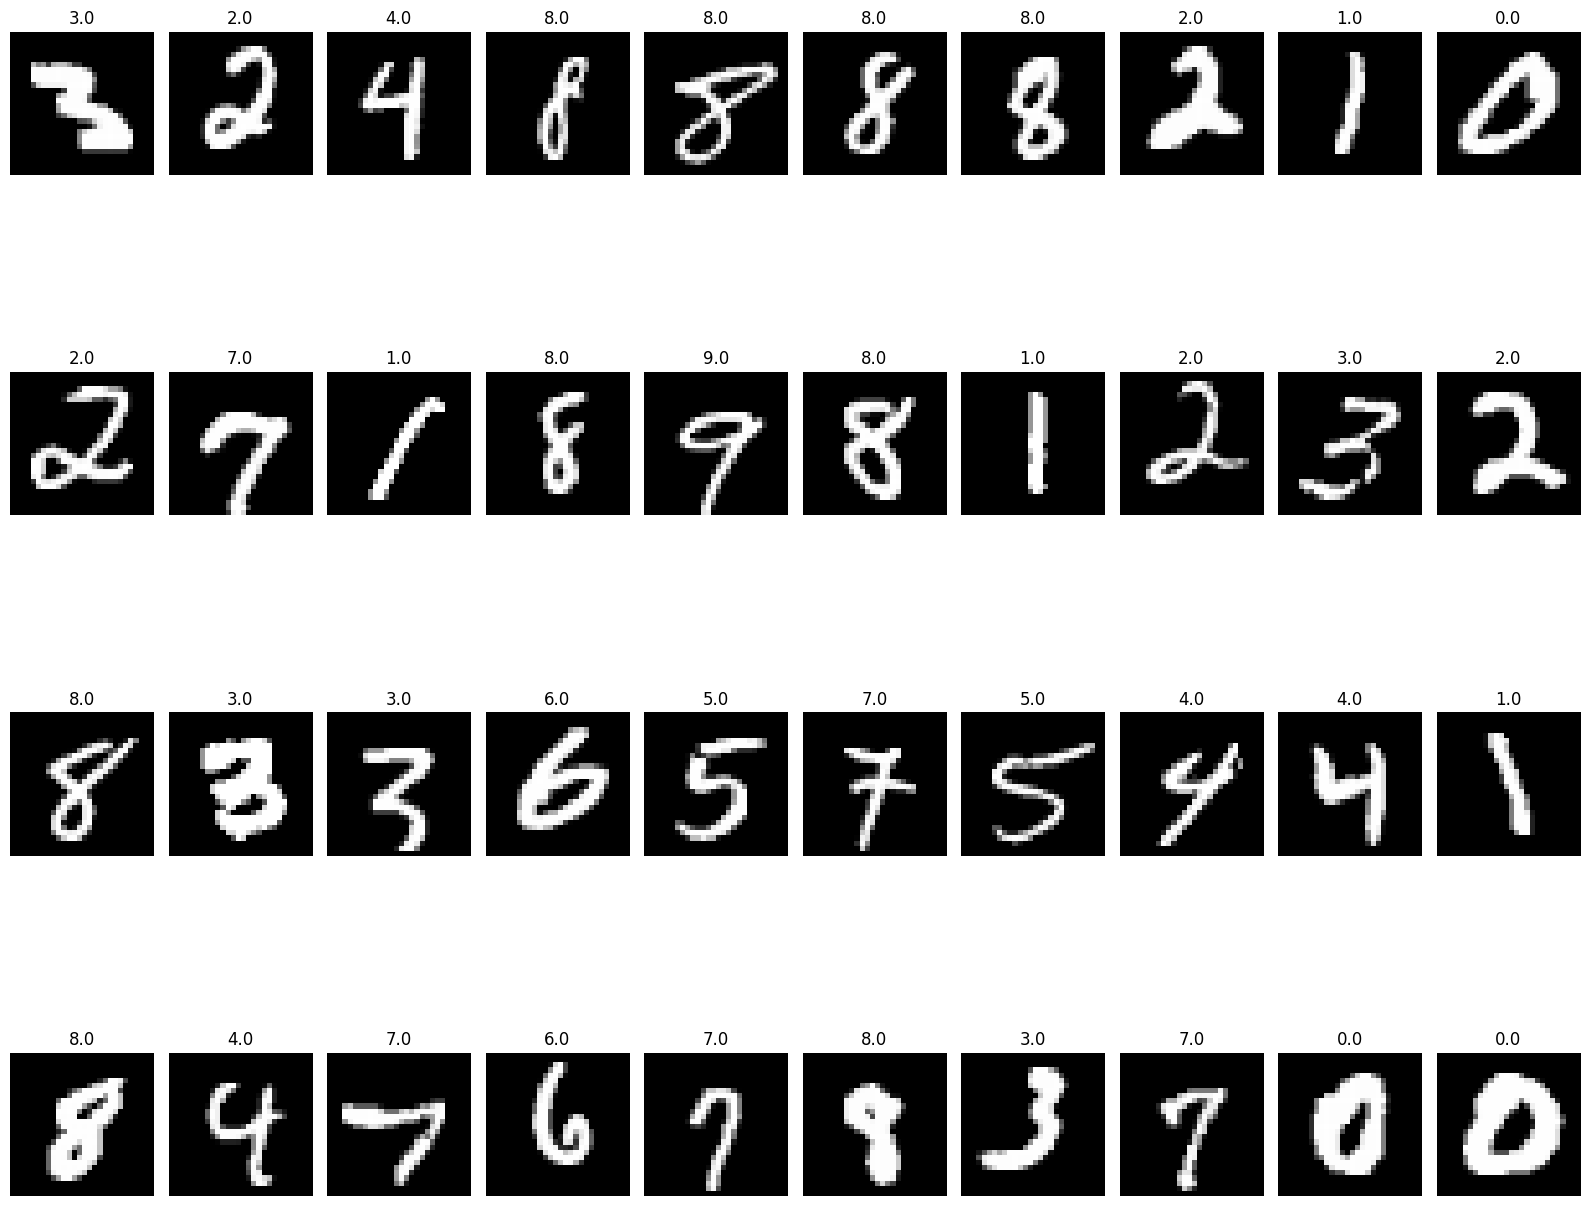

In [3]:
def plot_categories(training_images, training_labels):
  fig, axes = plt.subplots(4, 10, figsize=(16, 15))
  axes = axes.flatten()

  for k in range(40):
    img = training_images[k]
    img = np.expand_dims(img, axis=-1)
    img = array_to_img(img)
    ax = axes[k]
    ax.imshow(img, cmap="Greys_r")
    ax.set_title(f"{training_labels[k]}")
    ax.set_axis_off()

  plt.tight_layout()
  plt.show()

plot_categories(x_train, y_train)

### Get the labels of the dataset

In [4]:
np.unique(y_train)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

## Generators to train and validate the CNN

In [5]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2],1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2],1))
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10, dtype='float32')
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10, dtype='float32')

#Performing data augmentation to avoid overfiting
train_datagen = ImageDataGenerator(rescale= (1./255))
train_generator = train_datagen.flow(x = x_train, y = y_train, batch_size = 32 )

# Test generator only with rescale
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow(x = x_test, y = y_test, batch_size = 32)


## Design the model using Convolutional NN

In [6]:
model = Sequential()
model.add(InputLayer(input_shape = (28,28,1)))
model.add(Conv2D(filters = 64,kernel_size = 5, strides = 2,activation = 'LeakyReLU', padding = 'Same'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 128,kernel_size = 5, strides = 2,activation = 'LeakyReLU',padding = 'Same'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 256,kernel_size = 5, strides = 2,activation = 'LeakyReLU',padding = 'Same'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 64)        1664      
                                                                 
 batch_normalization (Batch  (None, 14, 14, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 batch_normalization_1 (Bat  (None, 7, 7, 128)         512       
 chNormalization)                                                
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 256)         819456    
                                                                 
 batch_normalization_2 (Bat  (None, 4, 4, 256)         1

In [7]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Callbacks for earlystopping 

In [8]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("Early stopping")
      self.model.stop_training = True

## Model training

In [9]:
callbacks = myCallback()
history = model.fit(train_generator, epochs= 100, steps_per_epoch=20, validation_data = test_generator, verbose = 2, validation_steps=3, callbacks = callbacks )

Epoch 1/100
20/20 - 5s - loss: 1.5651 - accuracy: 0.6266 - val_loss: 1.9938 - val_accuracy: 0.7604 - 5s/epoch - 255ms/step
Epoch 2/100
20/20 - 0s - loss: 0.8072 - accuracy: 0.7937 - val_loss: 1.7807 - val_accuracy: 0.7917 - 158ms/epoch - 8ms/step
Epoch 3/100
20/20 - 0s - loss: 0.4892 - accuracy: 0.8453 - val_loss: 1.7159 - val_accuracy: 0.7292 - 150ms/epoch - 7ms/step
Epoch 4/100
20/20 - 0s - loss: 0.4791 - accuracy: 0.8687 - val_loss: 1.6396 - val_accuracy: 0.8125 - 146ms/epoch - 7ms/step
Epoch 5/100
20/20 - 0s - loss: 0.2977 - accuracy: 0.9000 - val_loss: 1.4966 - val_accuracy: 0.7917 - 144ms/epoch - 7ms/step
Epoch 6/100
20/20 - 0s - loss: 0.4017 - accuracy: 0.8969 - val_loss: 1.5300 - val_accuracy: 0.6875 - 146ms/epoch - 7ms/step
Epoch 7/100
20/20 - 0s - loss: 0.3998 - accuracy: 0.8734 - val_loss: 1.5845 - val_accuracy: 0.5104 - 146ms/epoch - 7ms/step
Epoch 8/100
20/20 - 0s - loss: 0.3091 - accuracy: 0.9156 - val_loss: 1.3511 - val_accuracy: 0.6875 - 143ms/epoch - 7ms/step
Epoch 9/1

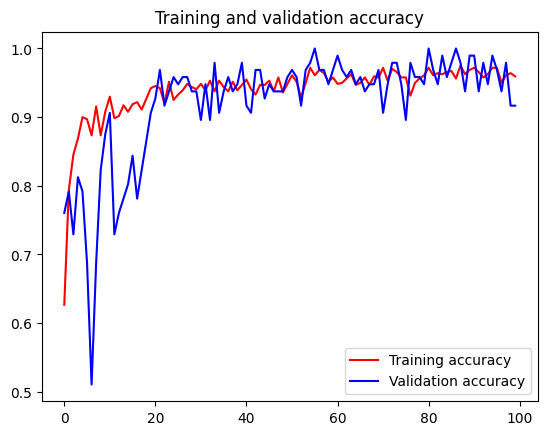

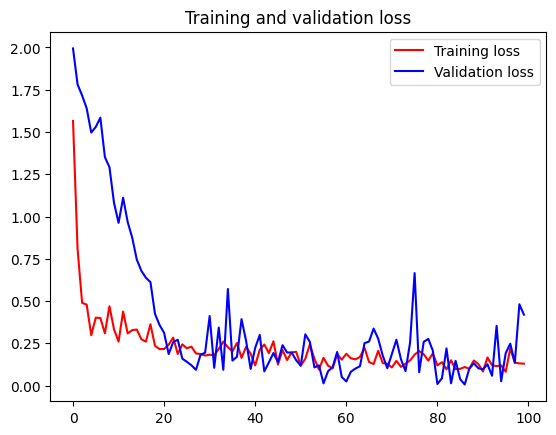

<Figure size 640x480 with 0 Axes>

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

## Predicting labels on the unseen data

In [11]:
## Predict the values on the validation dataset
y_predicted = model.predict(x_validation)
## np.argmax to get the label with the better probability
validation_labels = [np.argmax(i) for i in y_predicted]

875/875 [==============================] - 2s 2ms/step


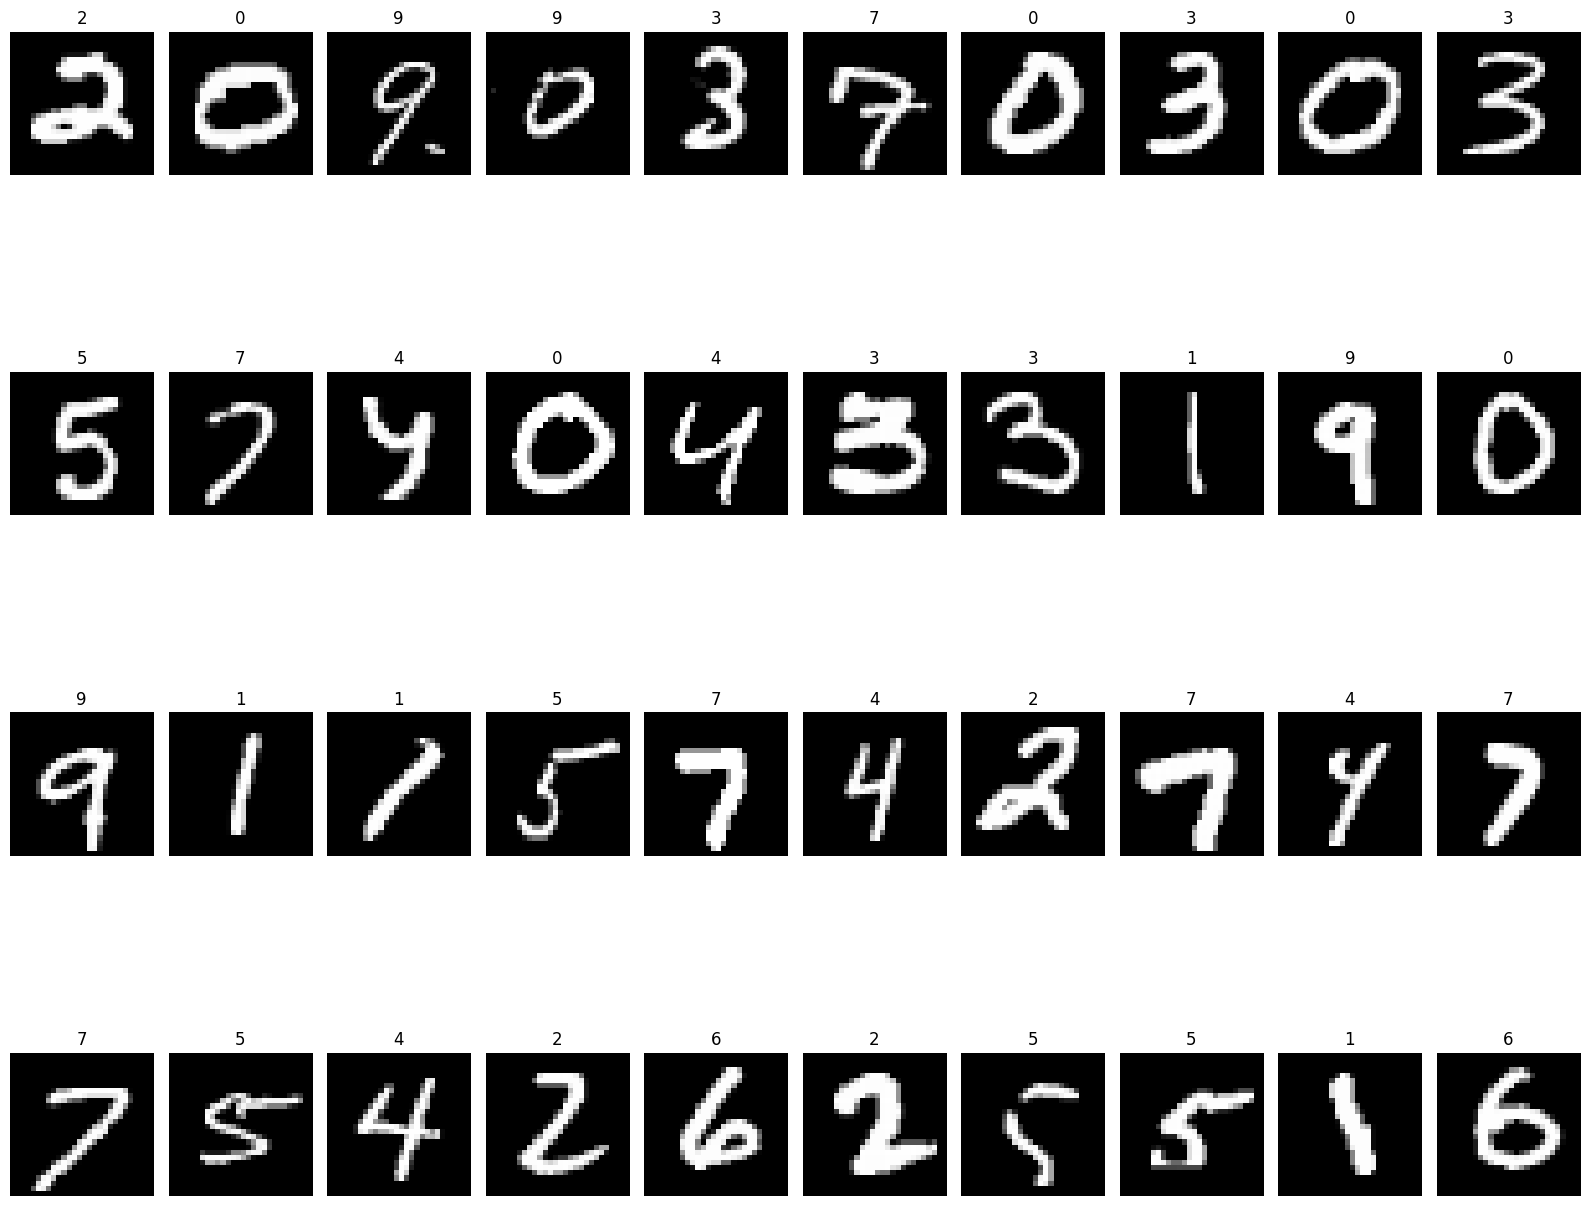

In [12]:
x_validation = x_validation.reshape((x_validation.shape[0], x_validation.shape[1], x_validation.shape[2]))
plot_categories(x_validation, validation_labels)

In [13]:
predictions = pd.DataFrame({'ImageId': range(1,len(validation_labels)+1,1),'Label':validation_labels})
predictions.to_csv('submission.csv',index = False)